# Linear Regression with Stochastic Gradient Descent

In this notebook, we will find the solution for Linear Regression using Stochastic Gradient Descent


In [1]:
import numpy as np
from dataset import X_train, X_test, y_train, y_test
import matplotlib.pyplot as plt

## Input augmentation

Add a column of 1's to X_train and X_test

In [2]:
# Add column to X_train and X_test
X_train = np.hstack((np.ones(X_train.shape[0]).reshape(-1, 1), X_train))
X_test = np.hstack((np.ones(X_test.shape[0]).reshape(-1, 1), X_test))

# Stochastic Gradient Descent

In [13]:
def make_prediction(X, w):
    """
    Make prediction based on the test features
    :param X: the augmented test features
    :param w: the optimal parameter
    :return: the predicted label
    """
    return X @ w


def find_w_sgd(X, y, learning_rate=1e-3, epochs=10):
    """
    Find the solution of linear regression using Stochastic Gradient Descent
    :param X: the augmented training features
    :param y: the augmented training labels
    :return: the optimal weight w
    """
    # Initialize the w parameter
    w = np.random.randn(X.shape[1])
    
    # Keep track of the cost function 
    cost = []
    
    # Go through epochs
    for epoch in range(epochs):
        # Shuffle X and y
        random_indices = np.arange(X.shape[0])
        np.random.shuffle(random_indices)
        
        # Go through training examples
        for i in random_indices:
            x_current, y_current = X[i], y[i]
            w = w + learning_rate * (y_current - np.dot(w, x_current)) * x_current
            
        # Get the current cost
        cost_current = (1 / (2 * X.shape[0])) * np.dot(y - X @ w, y - X @ w)
        cost.append(cost_current)
        
        # Display the epoch
        print(f"EPOCH {epoch} - Cost {cost_current}")
        
    return w, cost

In [18]:
# Find the analytical solution of w
w_optimal, costs = find_w_sgd(X_train, y_train, epochs=50)

EPOCH 0 - Cost 0.16303237410210306
EPOCH 1 - Cost 0.015283134617454326
EPOCH 2 - Cost 0.007380043918377731
EPOCH 3 - Cost 0.00571570855747649
EPOCH 4 - Cost 0.004950123887498106
EPOCH 5 - Cost 0.004446111934456033
EPOCH 6 - Cost 0.004026191308567216
EPOCH 7 - Cost 0.0037070137293704016
EPOCH 8 - Cost 0.0034435058653502076
EPOCH 9 - Cost 0.003221710527575571
EPOCH 10 - Cost 0.003043674891774892
EPOCH 11 - Cost 0.0028925265625745597
EPOCH 12 - Cost 0.0027583411907369237
EPOCH 13 - Cost 0.002649050333113565
EPOCH 14 - Cost 0.0025564011109547578
EPOCH 15 - Cost 0.0024814667534145303
EPOCH 16 - Cost 0.002416381516412879
EPOCH 17 - Cost 0.0023693725224056793
EPOCH 18 - Cost 0.0023198699816059554
EPOCH 19 - Cost 0.0022804012743415296
EPOCH 20 - Cost 0.002243977529956892
EPOCH 21 - Cost 0.002236470372504968
EPOCH 22 - Cost 0.0021961262505405905
EPOCH 23 - Cost 0.002176417849570683
EPOCH 24 - Cost 0.0021617521359433194
EPOCH 25 - Cost 0.0021461129665415147
EPOCH 26 - Cost 0.0021357963771687248


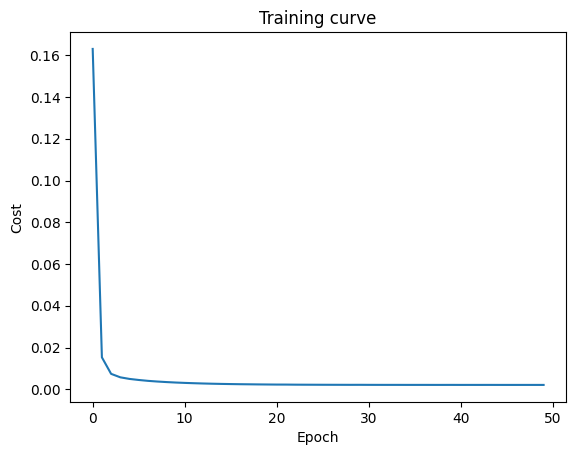

In [22]:
# Plot the cost value
plt.plot(np.arange(len(costs)), costs)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Training curve")
plt.show()

In [19]:
# Make prediction on training set and test set
y_train_predicted = make_prediction(X_train, w_optimal)
y_test_predicted = make_prediction(X_test, w_optimal)

# Calculate the mean squared error
mse_train = (1 / (2 * X_train.shape[0])) * np.dot(y_train - y_train_predicted, y_train - y_train_predicted)
mse_test = (1 / (2 * X_test.shape[0])) * np.dot(y_test - y_test_predicted, y_test - y_test_predicted)

# Display the MSE of the train and test set
print(f"MSE for training set: {mse_train}")
print(f"MSE for test set: {mse_test}")

MSE for training set: 0.0020749044658991307
MSE for test set: 0.0021974374591202726
